# Load KBase

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the KBase
import cobrakbase
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

# prevent excessive warnings
from time import process_time
import warnings
warnings.filterwarnings(action='once')
%run ../../modelseedpy/community/mssmetana.py

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


# test community pairs

# "+" interactions

## YR343 on CF142

In [2]:
# from cobra.medium import minimal_medium
# media = minimal_medium(YR343, minimize_components=True).to_dict()

In [3]:
# print(media)
# for cpd in media:
#     print(cpd)

In [4]:
# load the pair
YR343 = kbase_api.get_from_ws("Pantoea_YR343_pacbio_v2.RAST.fbamodel", 114731)
CF142 = kbase_api.get_from_ws("Rhizobium_CF142_pacbio_v2.RAST.fbamodel", 114731)
YR343_CF142_models = [YR343, CF142]
YR343_CF142_model = kbase_api.get_from_ws("YR343-CF142", 114731)

In [5]:
# test the pair
start_time = process_time()
try:
    YR343_CF142 = MSSmetana(YR343_CF142_models, YR343_CF142_model)
    YR343_CF142.mro_score()
    YR343_CF142.mip_score(interacting_media=YR343_CF142.media)
    YR343_CF142.mu_score()
    YR343_CF142.mp_score()
    YR343_CF142.sc_score()
    YR343_CF142.smetana_score();
    end_time = process_time()

    print(f"The YR343_CF142 pair has been examined after {(end_time-start_time)/60}.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## YR343 on CF313

In [6]:
# # load the pair
# YR343 = kbase_api.get_from_ws("Pantoea_YR343_pacbio_v2.RAST.fbamodel", 114731)
# CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
# YR343_CF313_models = [YR343, CF313]
# YR343_CF313_model = kbase_api.get_from_ws("YR343-CF313",114731)
                               
# # test the pair
# try:
#     start_time = process_time()
#     YR343_CF313 = MSSmetana(YR343_CF313_models, YR343_CF313_model)
#     YR343_CF313.mro_score()
#     YR343_CF313.mip_score(interacting_media=YR343_CF313.media)
#     YR343_CF313.mu_score()
#     YR343_CF313.mp_score()
#     YR343_CF313.sc_score()
#     YR343_CF313.smetana_score();
#     end_time = process_time()

#     print(f"The YR343_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
# except ObjectiveError as e:
#     print(e)

In [7]:
# load the pair
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
YR343_CF313_models = [YR343, CF313]
YR343_CF313_model = kbase_api.get_from_ws("YR343-CF313",114731)
                               
# test the pair
try:
    start_time = process_time()
    YR343_CF313 = MSSmetana(YR343_CF313_models, YR343_CF313_model)
    YR343_CF313.mro_score()
    YR343_CF313.mip_score(interacting_media=YR343_CF313.media)
    YR343_CF313.mu_score()
    YR343_CF313.mp_score()
    YR343_CF313.sc_score()
    YR343_CF313.smetana_score();
    end_time = process_time()

    print(f"The YR343_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}
{(<FBAModel Pantoea_YR343_pacbio_v2.RAST.fbamodel at 0x1b0429eeeb0>, <FBAModel Variovorax_CF313_pacbio_v2.RAST.fbamodel at 0x1b02f187e50>): {'EX_cpd00007_e0',
                                                                                                                                             'EX_cpd00030_e0',
                                                                                                                                             'EX_cpd00034_e0',
                                                                                                                                             'EX_cpd00048_e0',
                                                                                                                                       

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'cpd00001_e0': 1.0,
                                           'cpd00007_e0': 1.0,
                                           'cpd00013_e0': 0.66,
                                           'cpd00017_e0': 1.0,
                                           'cpd00023_e0': 1.0,
                                           'cpd00027_e0': 0.11,
                                           'cpd00028_e0': 1.0,
                                           'cpd00030_e0': 1.0,
                                           'cpd00034_e0': 1.0,
                                           'cpd00036_e0': 0.04,
                                           'cpd00039_e0': 1.0,
                                           'cpd00048_e0': 1.0,
                                         

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 732
MP score:			The possible contributions of each member in the member media include:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': ['cpd00100_e0',
                                           'cpd00092_e0',
                                           'cpd00067_e0',
                                           'cpd00129_e0',
                                           'cpd00161_e0',
                                           'cpd00130_e0',
                                           'cpd00024_e0',
                                           'cpd00084_e0',
                                           'cpd00047_e0',
                                           'cpd00013_e0',
                                           'cpd00065_e0',
                                           'cpd00060_e0',
                     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 63.57},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Pantoea_YR343_pacbio_v2.RAST.fbamodel': 47.18}}
The YR343_CF313 pair has been examined after 1.4809895833333333 minutes.


## AP49 on BC15

In [8]:
AP49 = kbase_api.get_from_ws("Sphingobium_AP49_pacbio_v2.RAST.fbamodel", 114731)
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
AP49_BC15_models = [AP49,BC15]
AP49_BC15_model = kbase_api.get_from_ws("AP49-BC15", 114731)

try:
    start_time = process_time()
    AP49_BC15 = MSSmetana(AP49_BC15_models, AP49_BC15_model)
    AP49_BC15.mro_score()
    AP49_BC15.mip_score(interacting_media=AP49_BC15.media)
    AP49_BC15.mu_score()
    AP49_BC15.mp_score()
    AP49_BC15.sc_score()
    AP49_BC15.smetana_score()
    end_time = process_time()

    print(f"The AP49_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}
{(<FBAModel Sphingobium_AP49_pacbio_v2.RAST.fbamodel at 0x1b03cb309a0>, <FBAModel Bacillus_sp._bc15.RAST.fbamodel at 0x1b081bb38b0>): {'EX_cpd00007_e0',
                                                                                                                                       'EX_cpd00028_e0',
                                                                                                                                       'EX_cpd00030_e0',
                                                                                                                                       'EX_cpd00034_e0',
                                                                                                                                       'EX_cpd00048_e0',
      

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.13,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.32,
                                     'cpd00024_e0': 0.28,
                                     'cpd00027_e0': 0.93,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 0.31,
                                     'cpd00048_e0': 1.0,
                                     'cpd00051_e0': 1.

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 706
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00100_e0',
                                     'cpd00092_e0',
                                     'cpd00067_e0',
                                     'cpd00129_e0',
                                     'cpd00159_e0',
                                     'cpd00073_e0',
                                     'cpd00084_e0',
                                     'cpd00047_e0',
                                     'cpd00064_e0',
                                     'cpd00013_e0',
                                     'cpd00065_e0',
                                     'cpd00060_e0',
                                     'cpd00117_e0',
                                     'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Bacillus_sp._bc15.RAST.fbamodel': None,
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 0.0}}

smetana score:

{'Bacillus_sp._bc15.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 52.63},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 46.0}}
The AP49_BC15 pair has been examined after 1.7911458333333334 minutes.


## CF142 on BC15

In [9]:
CF142_BC15_models = [CF142, BC15]
CF142_BC15_model = kbase_api.get_from_ws("CF142-BC15", 114731)

try:
    start_time = process_time()
    CF142_BC15 = MSSmetana(CF142_BC15_models, CF142_BC15_model)
    CF142_BC15.mro_score()
    CF142_BC15.mip_score(interacting_media=CF142_BC15.media)
    CF142_BC15.mu_score()
    CF142_BC15.mp_score()
    CF142_BC15.sc_score()
    CF142_BC15.smetana_score()
    end_time = process_time()

    print(f"The CF142_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## CF402 on CF313

In [10]:
CF402 = kbase_api.get_from_ws("Duagnella_sp_CF402.RAST.fbamodel", 114731)
CF402_CF313_models = [CF402,CF313]
CF402_CF313_model = kbase_api.get_from_ws("CF402-CF313", 114731)

try:
    start_time = process_time()
    CF402_CF313 = MSSmetana(CF402_CF313_models, CF402_CF313_model)
    CF402_CF313.mro_score()
    CF402_CF313.mip_score(interacting_media=CF402_CF313.media)
    CF402_CF313.mu_score()
    CF402_CF313.mp_score()
    CF402_CF313.sc_score()
    CF402_CF313.smetana_score()
    end_time = process_time()

    print(f"The CF402_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 2 change(s): {'dictionary_item_removed': [root['EX_cpd00218_e0'], root['EX_cpd00035_e0']]}
{(<FBAModel Duagnella_sp_CF402.RAST.fbamodel at 0x1b08bb12dc0>, <FBAModel Variovorax_CF313_pacbio_v2.RAST.fbamodel at 0x1b02f187e50>): {'EX_cpd00007_e0',
                                                                                                                                        'EX_cpd00028_e0',
                                                                                                                                        'EX_cpd00030_e0',
                                                                                                                                        'EX_cpd00034_e0',
                                                                                

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 2			2 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00218_e0'], root['EX_cpd00035_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Duagnella_sp_CF402.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                      'cpd00018_e0': 1.0,
                                      'cpd00023_e0': 1.0,
                                      'cpd00027_e0': 1.0,
                                      'cpd00028_e0': 1.0,
                                      'cpd00030_e0': 1.0,
                                      'cpd00033_e0': 1.0,
                                      'cpd00034_e0': 1.0,
                                      'cpd00035_e0': 1.0,
                                      'cpd00039_e0': 1.0,
                                      'cpd00041_e0': 1.0,
                                      'cpd00046_e0': 1.0,
                                      'cpd00048_e0': 1.0,
  

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 835
MP score:			The possible contributions of each member in the member media include:

{'Duagnella_sp_CF402.RAST.fbamodel': ['cpd00067_e0',
                                      'cpd00041_e0',
                                      'cpd00060_e0',
                                      'cpd00129_e0',
                                      'cpd00161_e0',
                                      'cpd00011_e0',
                                      'cpd00218_e0',
                                      'cpd00023_e0',
                                      'cpd00084_e0',
                                      'cpd00035_e0',
                                      'cpd00001_e0',
                                      'cpd00033_e0',
                                      'cpd00132_e0',
                            

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 32.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 38.0}}
The CF402_CF313 pair has been examined after 0.6890625 minutes.


## CF402 on BC15

In [11]:
CF402_BC15_models = [CF402,BC15]
CF402_BC15_model = kbase_api.get_from_ws("CF402-BC15", 114731)

try:
    start_time = process_time()
    CF402_BC15 = MSSmetana(CF402_BC15_models, CF402_BC15_model)
    CF402_BC15.mro_score()
    CF402_BC15.mip_score(interacting_media=CF402_BC15.media)
    CF402_BC15.mu_score()
    CF402_BC15.mp_score()
    CF402_BC15.sc_score()
    CF402_BC15.smetana_score()
    end_time = process_time()

    print(f"The CF402_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 8 change(s): {'dictionary_item_removed': [root['EX_cpd00060_e0'], root['EX_cpd00129_e0'], root['EX_cpd00051_e0'], root['EX_cpd00107_e0'], root['EX_cpd00069_e0'], root['EX_cpd00218_e0'], root['EX_cpd00035_e0']], 'values_changed': {"root['EX_cpd00084_e0']": {'new_value': 158.07256829270503, 'old_value': 158.07256829270636}}}
{(<FBAModel Duagnella_sp_CF402.RAST.fbamodel at 0x1b08bb12dc0>, <FBAModel Bacillus_sp._bc15.RAST.fbamodel at 0x1b081bb38b0>): {'EX_cpd00007_e0',
                                                                                                                               'EX_cpd00028_e0',
                                                                                                                               'EX_cpd00030_e0',
                           

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 7			7 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00060_e0'], root['EX_cpd00129_e0'], root['EX_cpd00051_e0'], root['EX_cpd00107_e0'], root['EX_cpd00069_e0'], root['EX_cpd00218_e0'], root['EX_cpd00035_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.13,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.32,
                                     'cpd00024_e0': 0.28,
                                     'cpd00027_e0': 0.93,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 736
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00100_e0',
                                     'cpd00092_e0',
                                     'cpd00067_e0',
                                     'cpd00129_e0',
                                     'cpd00159_e0',
                                     'cpd00073_e0',
                                     'cpd00084_e0',
                                     'cpd00047_e0',
                                     'cpd00064_e0',
                                     'cpd00013_e0',
                                     'cpd00065_e0',
                                     'cpd00060_e0',
                                     'cpd00117_e0',
                                     'cpd

# "-" interactions

## GM17 on CF142

In [12]:
GM17 = kbase_api.get_from_ws("Pseudomonas_GM17_pacbio_v2.RAST.fbamodel", 114731)
CF142 = kbase_api.get_from_ws("Rhizobium_CF142_pacbio_v2.RAST.fbamodel", 114731)
GM17_CF142_models = [GM17,CF142]
GM17_CF142_model = kbase_api.get_from_ws("GM17-CF142", 114731)

try:
    start_time = process_time()
    GM17_CF142 = MSSmetana(GM17_CF142_models, GM17_CF142_model)
    GM17_CF142.mro_score()
    GM17_CF142.mip_score(interacting_media=GM17_CF142.media)
    GM17_CF142.mu_score()
    GM17_CF142.mp_score()
    GM17_CF142.sc_score()
    GM17_CF142.smetana_score()
    end_time = process_time()

    print(f"The GM17_CF142 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## GM17 on BC15

In [13]:
GM17_BC15_models = [GM17,BC15]
GM17_BC15_model = kbase_api.get_from_ws("GM17-BC15", 114731)

try:
    start_time = process_time()
    GM17_BC15 = MSSmetana(GM17_BC15_models, GM17_BC15_model)
    GM17_BC15.mro_score()
    GM17_BC15.mip_score(interacting_media=GM17_BC15.media)
    GM17_BC15.mu_score()
    GM17_BC15.mp_score()
    GM17_BC15.sc_score()
    GM17_BC15.smetana_score()
    end_time = process_time()

    print(f"The GM17_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}
{(<FBAModel Pseudomonas_GM17_pacbio_v2.RAST.fbamodel at 0x1b096fa2a90>, <FBAModel Bacillus_sp._bc15.RAST.fbamodel at 0x1b081bb38b0>): {'EX_cpd00007_e0',
                                                                                                                                       'EX_cpd00028_e0',
                                                                                                                                       'EX_cpd00030_e0',
                                                                                                                                       'EX_cpd00034_e0',
                                                                                                                                       'EX_cpd00048_e0',
      

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.13,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.32,
                                     'cpd00024_e0': 0.28,
                                     'cpd00027_e0': 0.93,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 0.31,
                                     'cpd00048_e0': 1.0,
                                     'cpd00051_e0': 1.

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 713
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00100_e0',
                                     'cpd00092_e0',
                                     'cpd00067_e0',
                                     'cpd00129_e0',
                                     'cpd00159_e0',
                                     'cpd00073_e0',
                                     'cpd00084_e0',
                                     'cpd00047_e0',
                                     'cpd00064_e0',
                                     'cpd00013_e0',
                                     'cpd00065_e0',
                                     'cpd00060_e0',
                                     'cpd00117_e0',
                                     'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Bacillus_sp._bc15.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 0.0}}

smetana score:

{'Bacillus_sp._bc15.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 53.00000000000001},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 48.1}}
The GM17_BC15 pair has been examined after 2.74140625 minutes.


## CF313 on CF142 

In [14]:
CF313_CF142_models = [CF313,CF142]
CF313_CF142_model = kbase_api.get_from_ws("CF313-CF142", 114731)

try:
    start_time = process_time()
    CF313_CF142 = MSSmetana(CF313_CF142_models, CF313_CF142_model)
    CF313_CF142.mro_score()
    CF313_CF142.mip_score(interacting_media=CF313_CF142.media)
    CF313_CF142.mu_score()
    CF313_CF142.mp_score()
    CF313_CF142.sc_score()
    CF313_CF142.smetana_score()
    end_time = process_time()

    print(f"The CF313_CF142 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## AP07 on AP49

In [15]:
AP07 = kbase_api.get_from_ws("Caulobacter_AP07_pacbio_v2.RAST.fbamodel", 114731)
AP07_AP49_models = [AP07,AP49]
AP07_AP49_model = kbase_api.get_from_ws("AP07-AP49", 114731)

try:
    start_time = process_time()
    AP07_AP49 = MSSmetana(AP07_AP49_models, AP07_AP49_model)
    AP07_AP49.mro_score()
    AP07_AP49.mip_score(interacting_media=AP07_AP49.media)
    AP07_AP49.mu_score()
    AP07_AP49.mp_score()
    AP07_AP49.sc_score()
    AP07_AP49.smetana_score()
    end_time = process_time()

    print(f"The AP07_AP49 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 1 change(s): {'values_changed': {"root['EX_cpd00276_e0']": {'new_value': 866.6148741020052, 'old_value': 888.4910867653848}}}
{(<FBAModel Caulobacter_AP07_pacbio_v2.RAST.fbamodel at 0x1b0a9c58a60>, <FBAModel Sphingobium_AP49_pacbio_v2.RAST.fbamodel at 0x1b03cb309a0>): {'EX_cpd00007_e0',
                                                                                                                                                'EX_cpd00009_e0',
                                                                                                                                                'EX_cpd00028_e0',
                                                                                                                                                'EX_cpd00030_e0',
             

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'cpd00001_e0': 0.02,
                                              'cpd00007_e0': 1.0,
                                              'cpd00009_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00023_e0': 0.03,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00033_e0': 0.13,
                                              'cpd00034_e0': 1.0,
                                              'cpd00036_e0': 0.56,
                                              'cpd00039_e0': 1.0,
                                              'cpd00048_e0': 1.0,
    

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 641
MP score:			The possible contributions of each member in the member media include:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': ['cpd00067_e0',
                                              'cpd00129_e0',
                                              'cpd00084_e0',
                                              'cpd00013_e0',
                                              'cpd00060_e0',
                                              'cpd00036_e0',
                                              'cpd00138_e0',
                                              'cpd00182_e0',
                                              'cpd00066_e0',
                                              'cpd03279_e0',
                                              'cpd00033_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 0.0},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 44.76},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': 45.0}}
The AP07_AP49 pair has been examined after 1.1328125 minutes.


## CF313 on BT03

In [16]:
BT03 = kbase_api.get_from_ws("Burkholderia_sp._BT03.RAST.fbamodel", 114731)
CF313_BT03_models = [CF313,BT03]
CF313_BT03_model = kbase_api.get_from_ws("CF313-BT03", 114731)

try:
    start_time = process_time()
    CF313_BT03 = MSSmetana(CF313_BT03_models, CF313_BT03_model)
    CF313_BT03.mro_score()
    CF313_BT03.mip_score(interacting_media=CF313_BT03.media)
    CF313_BT03.mu_score()
    CF313_BT03.mp_score()
    CF313_BT03.sc_score()
    CF313_BT03.smetana_score()
    end_time = process_time()

    print(f"The CF313_BT03 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}
{(<FBAModel Variovorax_CF313_pacbio_v2.RAST.fbamodel at 0x1b02f187e50>, <FBAModel Burkholderia_sp._BT03.RAST.fbamodel at 0x1b039ab5d30>): {'EX_cpd00007_e0',
                                                                                                                                           'EX_cpd00028_e0',
                                                                                                                                           'EX_cpd00030_e0',
                                                                                                                                           'EX_cpd00034_e0',
                                                                                                                                           'EX_

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                         'cpd00009_e0': 0.25,
                                         'cpd00017_e0': 1.0,
                                         'cpd00023_e0': 0.02,
                                         'cpd00024_e0': 0.03,
                                         'cpd00028_e0': 1.0,
                                         'cpd00030_e0': 1.0,
                                         'cpd00034_e0': 1.0,
                                         'cpd00036_e0': 0.01,
                                         'cpd00039_e0': 1.0,
                                         'cpd00041_e0': 0.02,
                                         'cpd00048_e0': 1.0,
                                         'cpd00051_e0': 1.0,
  

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 114
MP score:			The possible contributions of each member in the member media include:

{'Burkholderia_sp._BT03.RAST.fbamodel': ['cpd00092_e0',
                                         'cpd00067_e0',
                                         'cpd00129_e0',
                                         'cpd00159_e0',
                                         'cpd00024_e0',
                                         'cpd00084_e0',
                                         'cpd00047_e0',
                                         'cpd00105_e0',
                                         'cpd00013_e0',
                                         'cpd00060_e0',
                                         'cpd00053_e0',
                                         'cpd00117_e0',
                                         'cpd

## YR139 on CF142

In [17]:
YR139 = kbase_api.get_from_ws("Streptomyces_YR139_pacbio_v2.RAST.fbamodel", 114731)
YR139_CF142_models = [YR139,CF142]
YR139_CF142_model = kbase_api.get_from_ws("YR139-CF142", 114731)

try:
    start_time = process_time()
    YR139_CF142 = MSSmetana(YR139_CF142_models, YR139_CF142_model)
    YR139_CF142.mro_score()
    YR139_CF142.mip_score(interacting_media=YR139_CF142.media)
    YR139_CF142.mu_score()
    YR139_CF142.mp_score()
    YR139_CF142.sc_score()
    YR139_CF142.smetana_score()
    end_time = process_time()

    print(f"The YR139_CF142 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## BC15 on CF402

In [18]:
BC15_CF402_models = [BC15,CF402]
BC15_CF402_model = kbase_api.get_from_ws("BC15-CF402", 114731)

try:
    start_time = process_time()
    BC15_CF402 = MSSmetana(BC15_CF402_models, BC15_CF402_model)
    BC15_CF402.mro_score()
    BC15_CF402.mip_score(interacting_media=BC15_CF402.media)
    BC15_CF402.mu_score()
    BC15_CF402.mp_score()
    BC15_CF402.sc_score()
    BC15_CF402.smetana_score()
    end_time = process_time()

    print(f"The BC15_CF402 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)




Align exchange reactions in Bacillus_sp._bc15.RAST.fbamodel 



Align exchange reactions in Duagnella_sp_CF402.RAST.fbamodel 


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\io\dict.py:89: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(value, np.float):
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\io\dict.py:91: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstan



0 exchange reactions were substituted and 0 exchange metabolite IDs were redefined by align_exchanges().
cpd11416_c1 Bacillus_sp._bc15.RAST.fbamodel
bio2 1
[2]
cpd11416_c2 Duagnella_sp_CF402.RAST.fbamodel
bio3 1
[2, 3]
The community model None possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


# Statistically process the above results

## MRO scores

In [27]:
from scipy import stats
posInteractions = [0.9444444444444444, 0.7804878048780488, 0.5396825396825397, 0.53125]
negInteractions = [0.9047619047619048, 0.8780487804878049, 0.9473684210526315]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.13814374366211132


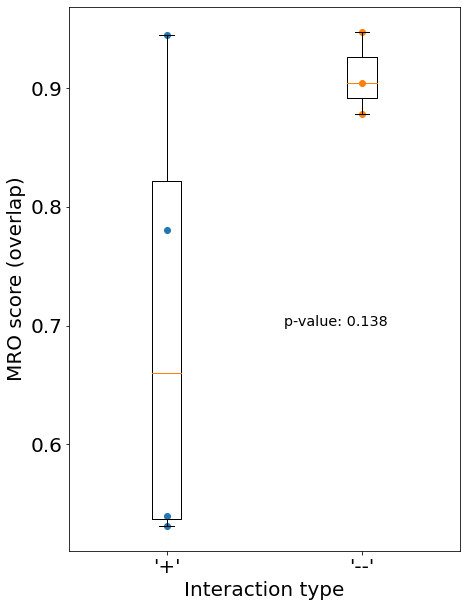

In [28]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MRO score (overlap)")
pyplot.text(1.6,.7, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("MRO comparion.jpg")
# display(fig)
# pyplot.show()

## MIP scores

In [29]:
from scipy import stats
posInteractions = [0, 0, 2, 7]
negInteractions = [0, 0, 0]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.30175554294386575


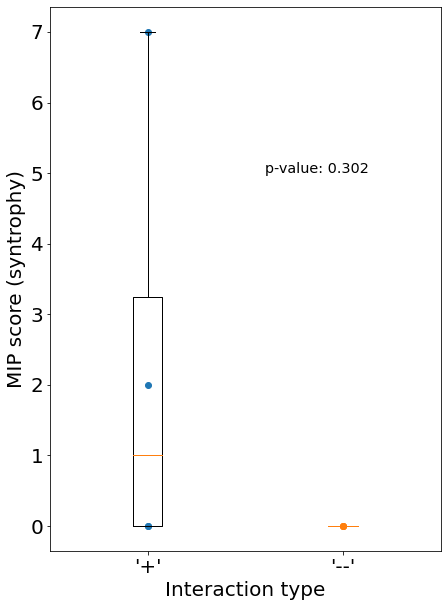

In [30]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MIP score (syntrophy)")
pyplot.text(1.6,5, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("MIP comparion.jpg")
# display(fig)
# pyplot.show()

## smetana score

In [31]:
from scipy import stats
posInteractions = [63.57, 47.18, 52.63, 46, 32, 38, 0, 0]
negInteractions = [53, 48.1, 44.76, 45, 0, 0]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.8147010129367964


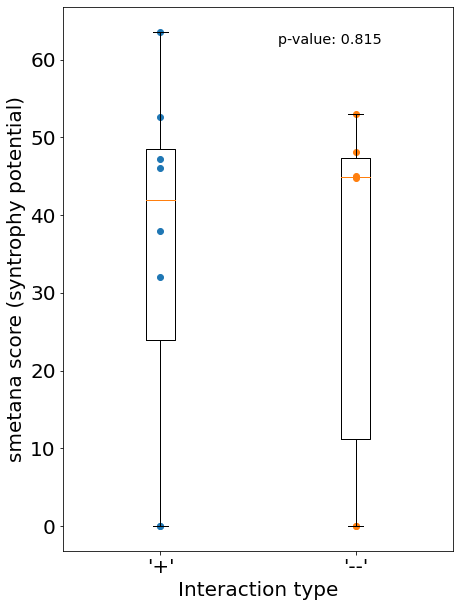

In [34]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("smetana score (syntrophy potential)")
pyplot.text(1.6,62, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("smetana comparion.jpg")
# display(fig)
# pyplot.show()